In [1]:
import pandas as pd
import seaborn as sns

sns.set_context("paper")
sns.set_style("darkgrid")

df = pd.read_json('/kaggle/input/pii-detection-removal-from-educational-data/train.json', orient="records").set_index("document")
df.head()

,full_text,tokens,trailing_whitespace,labels
document,,,,
7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


## Rate of PII labels out of all tokens:

In [2]:
labels =  df['labels']

pii_freq = (labels.explode() != "O").replace({True: "PII", False: "O"}).value_counts()
pii_rate = (labels.explode() != "O").replace({True: "PII", False: "O"}).value_counts(normalize=True)

pd.DataFrame([pii_freq, pii_rate]).T

,count,proportion
labels,,
O,4989794.0,0.999451
PII,2739.0,0.000549


#### The proportion of PII labels in general is significantly small. Some PIIs have a single occurence (!) in the entire dataset:

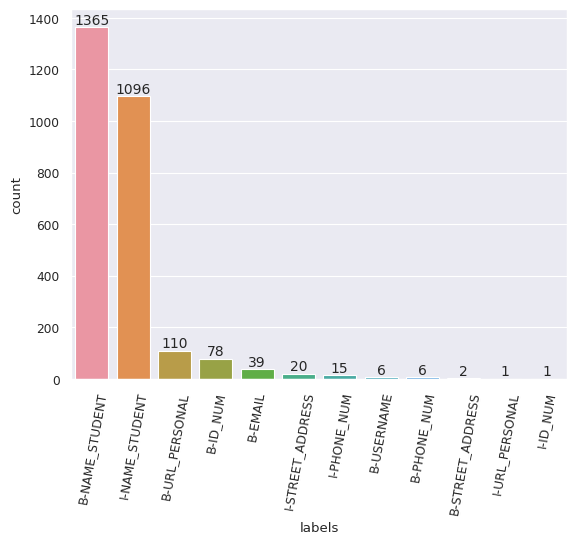

In [3]:
labels_freq = labels.explode().value_counts()

g = sns.barplot(x=labels_freq[1:].index, y=labels_freq[1:])
g.tick_params(axis='x', rotation=80)
g.bar_label(g.containers[0], fontsize=10);

#### Let's filter all non-PII tokens and analyze what we're looking for:

In [4]:
import numpy as np


pii_df = (
    df.drop(columns=["full_text"])
    .assign(token_pos=labels.apply(len).apply(np.arange))
    .explode(["tokens", "trailing_whitespace", "labels", "token_pos"])
    .query('labels != "O"')
    .set_index("token_pos", append=True)
    .sort_index()
)


pii_df

tokens trailing_whitespace          labels
document token_pos                                              
7        9          Nathalie                True  B-NAME_STUDENT
         10            Sylla               False  I-NAME_STUDENT
         482        Nathalie                True  B-NAME_STUDENT
         483           Sylla               False  I-NAME_STUDENT
         741        Nathalie                True  B-NAME_STUDENT
...                      ...                 ...             ...
15717    365         IV-8322                True        B-ID_NUM
         964         IV-8322                True        B-ID_NUM
19280    54             Z.S.                True        B-ID_NUM
         55         30407059               False        I-ID_NUM
20984    6            V69230               False        B-ID_NUM

[2739 rows x 3 columns]

## Emails

In [5]:
emails_df = pii_df[pii_df['labels'].str.contains("EMAIL", regex=False)]

emails_df

tokens trailing_whitespace   labels
document token_pos                                                       
379      28                 djones@gmail.com                True  B-EMAIL
2769     22            matthew72@hotmail.com               False  B-EMAIL
3709     53           belindarojas@yahoo.com                True  B-EMAIL
         55         kennethevans@hotmail.com               False  B-EMAIL
4227     3                   agood@gmail.com               False  B-EMAIL
         526                 agood@gmail.com               False  B-EMAIL
4381     23                hwillis@gmail.com                True  B-EMAIL
4438     12          kellyharrison@gmail.com                True  B-EMAIL
         578         kellyharrison@gmail.com                True  B-EMAIL
4465     871           lowetyler@hotmail.com               False  B-EMAIL
4777     439          murraythomas@gmail.com               False  B-EMAIL
5263     40            vmartinez@hotmail.com               False  B-EMAIL
5397     17               sheena82@yahoo.com               False  B-EMAIL
6243     7               nbarker@hotmail.com                True  B-EMAIL
         438             nbarker@hotmail.com                True  B-EMAIL
         465             nbarker@hotmail.com                True  B-EMAIL
6577     3          johnsondavid@hotmail.com               False  B-EMAIL
         634        johnsondavid@hotmail.com               False  B-EMAIL
6611     5           catherine19@hotmail.com               False  B-EMAIL
6900     12                 john03@yahoo.com               False  B-EMAIL
         469                john03@yahoo.com               False  B-EMAIL
7308     3                lisarose@gmail.com               False  B-EMAIL
         5             diazkristen@gmail.com               False  B-EMAIL
         380              lisarose@gmail.com               False  B-EMAIL
         382           diazkristen@gmail.com               False  B-EMAIL
8344     14               andrew58@gmail.com               False  B-EMAIL
8642     4             boydcynthia@yahoo.com                True  B-EMAIL
9146     69               laurie33@yahoo.com               False  B-EMAIL
         248              laurie33@yahoo.com               False  B-EMAIL
10945    1           pauljohnson@hotmail.com               False  B-EMAIL
         549         pauljohnson@hotmail.com               False  B-EMAIL
11301    0           jarviscindy@hotmail.com               False  B-EMAIL
         441         jarviscindy@hotmail.com               False  B-EMAIL
11859    7                  jray@hotmail.com               False  B-EMAIL
11954    15                 gday@hotmail.com                True  B-EMAIL
         23                 gday@hotmail.com               False  B-EMAIL
         610                gday@hotmail.com                True  B-EMAIL
12989    6                noah14@hotmail.com                True  B-EMAIL
14484    294                hbrown@yahoo.com                True  B-EMAIL

All Emails have `@` in them:

In [6]:
emails_df['tokens'].str.contains("@", regex=False).all()

True

Although not all not all tokens contanining `@` are PIIs:

In [7]:
exploded_all_tokens_df = df[['tokens', 'labels']].explode(['tokens', 'labels'])
exploded_all_tokens_df[exploded_all_tokens_df['tokens'].str.contains('@', regex=False) & (exploded_all_tokens_df['labels'] == 'O')]

,tokens,labels
document,,
659,@Darden,O
2732,CORE@HTU,O
6457,@,O
7974,@,O
8192,@,O
8192,@,O
9854,vpi@mn.nl,O
11108,@,O
11108,@,O


No `I-EMAIL` labels in the training set at all:

In [8]:
emails_df[emails_df['labels'].str.contains("I-", regex=False)]

,,tokens,trailing_whitespace,labels
document,token_pos,,,


## URLs

In [9]:
urls_df = pii_df[pii_df['labels'].str.contains("URL", regex=False)]

urls_df

tokens  \
document token_pos                                                      
317      611         https://www.jackson.com/list/explorehomepage.htm   
379      31                     https://www.linkedin.com/in/mmartinez   
472      922                             https://youtu.be/rFD2lJuvace   
1309     497                 https://www.hall.biz/wp-contenthome.html   
1798     292        http://www.burns-lopez.com/categories/appabout...   
...                                                               ...   
13103    455                   https://hernandez.com/exploremain.html   
         457                https://www.roman.info/list/appindex.html   
         649                   https://hernandez.com/exploremain.html   
         651                https://www.roman.info/list/appindex.html   
13315    585                https://alvarado.com/categoriesindex.html   

                   trailing_whitespace          labels  
document token_pos                                      
317      611                     False  B-URL_PERSONAL  
379      31                       True  B-URL_PERSONAL  
472      922                      True  B-URL_PERSONAL  
1309     497                     False  B-URL_PERSONAL  
1798     292                     False  B-URL_PERSONAL  
...                                ...             ...  
13103    455                      True  B-URL_PERSONAL  
         457                      True  B-URL_PERSONAL  
         649                     False  B-URL_PERSONAL  
         651                     False  B-URL_PERSONAL  
13315    585                     False  B-URL_PERSONAL  

[111 rows x 3 columns]

Not all urls are considered as PIIs:

In [10]:
exploded_all_tokens_df[exploded_all_tokens_df['tokens'].str.contains('http', regex=False) & (exploded_all_tokens_df['labels'] == 'O')]

,tokens,labels
document,,
123,https://en.wikipedia.org/wiki/Homo_economicus,O
123,https://cyberleninka.ru/article/n/stremlenie-,O
123,http://www.intelros.ru/readroom/credo_new/k3-2...,O
123,https://cyberleninka.ru/article/n/14398333,O
123,https://cyberleninka.ru/article/n/stremlenie-k...,O
...,...,...
22371,http://www.designkit.org/methods,O
22425,https://www.coursera.org/learn/design-thinking-,O
22425,http://designresearchtechniques.com/casestudie...,O


There's a single `I-URL_Personal` in the train set:

In [11]:
urls_df[urls_df['labels'].str.contains("I-", regex=False)]

,,tokens,trailing_whitespace,labels
document,token_pos,,,
3202,34,nYZqnhEXw,False,I-URL_PERSONAL


Might be a typo...

In [12]:
urls_df.loc[3202]

,tokens,trailing_whitespace,labels
token_pos,,,
31,tps://www.facebook.com/bclark,False,B-URL_PERSONAL
33,https://www.youtube.com/channel/UC1ElAcppeuhfet,True,B-URL_PERSONAL
34,nYZqnhEXw,False,I-URL_PERSONAL


It might be interesting to know that all training B-URLs share the following common pattern `[a-string].[b-string]`

## ID Num

In [13]:
idnum_df = pii_df[pii_df['labels'].str.contains("ID", regex=False)]

idnum_df

tokens trailing_whitespace    labels
document token_pos                                            
609      26         860632713425                True  B-ID_NUM
         39         530670102508                True  B-ID_NUM
         50         530670102508                True  B-ID_NUM
         56         875673967537                True  B-ID_NUM
         62         860632713425                True  B-ID_NUM
...                          ...                 ...       ...
15717    365             IV-8322                True  B-ID_NUM
         964             IV-8322                True  B-ID_NUM
19280    54                 Z.S.                True  B-ID_NUM
         55             30407059               False  I-ID_NUM
20984    6                V69230               False  B-ID_NUM

[79 rows x 3 columns]

Can be related to a wide range of concepts, such as a student initials, ID number, social security number, etc.

There's a single `I-ID_NUM`:

In [14]:
idnum_df[idnum_df['labels'].str.contains("I-", regex=False)]

,,tokens,trailing_whitespace,labels
document,token_pos,,,
19280,55,30407059,False,I-ID_NUM


In [15]:
idnum_df.loc[19280]

,tokens,trailing_whitespace,labels
token_pos,,,
54,Z.S.,True,B-ID_NUM
55,30407059,False,I-ID_NUM


## Username

In [16]:
username_df = pii_df[pii_df['labels'].str.contains("USERNAME", regex=False)]

username_df

tokens trailing_whitespace      labels
document token_pos                                                  
3351     61         castanedagabriel                True  B-USERNAME
4462     4                    fdixon                True  B-USERNAME
         582                  fdixon                True  B-USERNAME
5716     1             meyermichelle               False  B-USERNAME
7786     623                 jacob59               False  B-USERNAME
8642     8             holmespatrick               False  B-USERNAME

## Phone Num

In [17]:
phone_df = pii_df[pii_df['labels'].str.contains("PHONE", regex=False)]

phone_df

tokens trailing_whitespace       labels
document token_pos                                               
4381     18                    (               False  B-PHONE_NUM
         19              320)202               False  I-PHONE_NUM
         20                    -               False  I-PHONE_NUM
         21           0688x95843                True  I-PHONE_NUM
4777     443                   (               False  B-PHONE_NUM
         444             223)392               False  I-PHONE_NUM
         445                   -               False  I-PHONE_NUM
         446                2765               False  I-PHONE_NUM
6243     11                    (               False  B-PHONE_NUM
         12              820)913               False  I-PHONE_NUM
         13                    -               False  I-PHONE_NUM
         14             3241x894               False  I-PHONE_NUM
         442                   (               False  B-PHONE_NUM
         443             820)913               False  I-PHONE_NUM
         444                   -               False  I-PHONE_NUM
         445            3241x894               False  I-PHONE_NUM
         469                   (               False  B-PHONE_NUM
         470             820)913               False  I-PHONE_NUM
         471                   -               False  I-PHONE_NUM
         472            3241x894               False  I-PHONE_NUM
9854     19         410.526.1667                True  B-PHONE_NUM

Many of the `B-PHONE_NUM` are `(` without trailing whitespace:

In [18]:
phone_df[phone_df["labels"].str.contains("B-")]

tokens trailing_whitespace       labels
document token_pos                                               
4381     18                    (               False  B-PHONE_NUM
4777     443                   (               False  B-PHONE_NUM
6243     11                    (               False  B-PHONE_NUM
         442                   (               False  B-PHONE_NUM
         469                   (               False  B-PHONE_NUM
9854     19         410.526.1667                True  B-PHONE_NUM

## Street Address

In [19]:
address_df = pii_df[pii_df['labels'].str.contains("STREET", regex=False)]

address_df

tokens trailing_whitespace            labels
document token_pos                                                   
9854     3                  591                True  B-STREET_ADDRESS
         4                Smith                True  I-STREET_ADDRESS
         5              Centers                True  I-STREET_ADDRESS
         6                  Apt               False  I-STREET_ADDRESS
         7                    .                True  I-STREET_ADDRESS
         8                  656               False  I-STREET_ADDRESS
         9                   \n               False  I-STREET_ADDRESS
         10         Joshuamouth               False  I-STREET_ADDRESS
         11                   ,                True  I-STREET_ADDRESS
         12                  RI                True  I-STREET_ADDRESS
         13               95963                True  I-STREET_ADDRESS
11442    150                743                True  B-STREET_ADDRESS
         151              Erika                True  I-STREET_ADDRESS
         152             Bypass                True  I-STREET_ADDRESS
         153                Apt               False  I-STREET_ADDRESS
         154                  .                True  I-STREET_ADDRESS
         155                419               False  I-STREET_ADDRESS
         156                 \n               False  I-STREET_ADDRESS
         157        Andreahaven               False  I-STREET_ADDRESS
         158                  ,                True  I-STREET_ADDRESS
         159                 IL                True  I-STREET_ADDRESS
         160              54207               False  I-STREET_ADDRESS

Only 2 different documents contain street addresses. These can be expressed in many different ways, and are meaningless without a wide context since many of the address tokens are actual english words. Both addresses are compromised of relatively high consequent number tokens. The first address is spreaded over more than a single line.

In addition, we've found the data may be missing PIIs:

In [20]:
print(df.loc[14731]["full_text"][73:401])

exploded_all_tokens_df.loc[14731].iloc[12:32]

I am a resident of Pension Almonde, a Rotterdam-based temporary social housing project in  Almonde Street. Whilst the Stad in de Maak Foundation has made the street, its apartments and  shops available to Urban Nomads for a fair price, the street will be demolished alongside the  temporary community that was created with it.




,tokens,labels
document,,
14731,I,O
14731,am,O
14731,a,O
14731,resident,O
14731,of,O
14731,Pension,O
14731,Almonde,O
14731,",",O
14731,a,O


## Names

The most frequent PII class, and not an easy one to predict. A PII name doesn't have to be a name of the essay author, as mentioned in the competition instructions:

`The full or partial name of a student that is not necessarily the author of the essay. This excludes instructors, authors, and other person names.`

In order to achieve a high score, we'll have to strive for a good performance over this category.

In [21]:
names_df = pii_df[pii_df['labels'].str.contains("NAME_STUDENT", regex=False)]

names_df

tokens trailing_whitespace          labels
document token_pos                                               
7        9           Nathalie                True  B-NAME_STUDENT
         10             Sylla               False  I-NAME_STUDENT
         482         Nathalie                True  B-NAME_STUDENT
         483            Sylla               False  I-NAME_STUDENT
         741         Nathalie                True  B-NAME_STUDENT
...                       ...                 ...             ...
13336    3          Cervantes               False  I-NAME_STUDENT
13342    0             Carlos                True  B-NAME_STUDENT
         1          Hernandez               False  I-NAME_STUDENT
         523           Carlos                True  B-NAME_STUDENT
         524        Hernandez               False  I-NAME_STUDENT

[2461 rows x 3 columns]

Names are allowed to contain non alphabet characters:

In [22]:
names_df.loc[12035]

,tokens,trailing_whitespace,labels
token_pos,,,
481,Ahmed,True,B-NAME_STUDENT
482,M.,True,I-NAME_STUDENT
483,Ali,False,I-NAME_STUDENT


As for the training set, all names start with a capital letter:


In [23]:
names_df["tokens"].str.istitle().all()

True

Many names are unrelated to the essay author, thus not considered as PIIs:

In [24]:
print(df.loc[123]["full_text"][2397:2450], "...")
exploded_all_tokens_df.loc[123].iloc[490: 500]

Alexander Shmakov, the author of the article “The pur ...


,tokens,labels
document,,
123,Alexander,O
123,Shmakov,O
123,",",O
123,the,O
123,author,O
123,of,O
123,the,O
123,article,O
123,“,O
